### Classifying Instances via Learning To Generate Instances from Their Labels

Bayes Rule:

Naive Bayes
Developing an instance from the label; not the other way.

term frequency inverse document frequency TFIDF: method for

* word frequency usually reflects the importance of the word
ie:
if word appears T times,
and a frequency of F across all training examples
weight = T/F

Vector has 1 component for each dictionary word, down-weighted by that word's T/F

This weighting is called: TFIDF (Term Frequency, Inverse Document Frequency)



In [8]:
testline = '12345ABCDEFGHIJKLMNOP'
count = int(testline[0:4]) # lines look like this: '245  hey'
token = testline[5:-1]

print(testline[0:])
print(testline[1:2])
print(testline[0:2])
print(testline[0:4])
print(testline[:1])
print(count)
print(token)

12345ABCDEFGHIJKLMNOP
2
12
1234
1
1234
ABCDEFGHIJKLMNO


In [9]:
# hapax legomenon: singleton words

def readvocab(vocab_path="vocab.txt"):
    lexiconsize = 0
    word_dict = {}
    word_dict['@unk'] = lexiconsize # unk. abbreviation for "unknown"
    lexiconsize += 1
    with open(vocab_path, "r") as f:
        data = f.readlines()

    for line in data:
        count = int(line[0:4]) # lines look like this: '245  hey'
        token = line[5:-1] # so '2453  hey' would grab 'h' to the end
        if count > 1: # we're only featuring words w/ 2 or more appearances
            word_dict[token] = lexiconsize
            lexiconsize += 1

    word_dict['@size'] = lexiconsize
    return word_dict

In [10]:
def tokenize(email_string, word_dict):
    vec = [0 for i in range(word_dict['@size'])]
    for t in email_string.split(" "):
        if t in word_dict: vec[word_dict[t]] += 1
        else: vec[word_dict['@unk']] += 1
    return vec

In [11]:
def getdat(filename, word_dict):
    with open(filename, "r") as f:
        data = f.readlines()
    dat = []
    labs = []
    for line in data:
        labs = labs + [int(line[0])]
        dat = dat + [tokenize(line[2:], word_dict)]
    return dat, labs

In [29]:
word_dict = readvocab()
traindat, trainlabs = getdat("spam-train.csv",word_dict)
testdat, testlabs = getdat("spam-test.csv",word_dict)

# decision tree run for comparison
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=12)
clf = clf.fit(traindat,trainlabs)
yhat = clf.predict(testdat)
sum([yhat[i] == testlabs[i] for i in range(len(testdat))])/len(testdat)

0.949

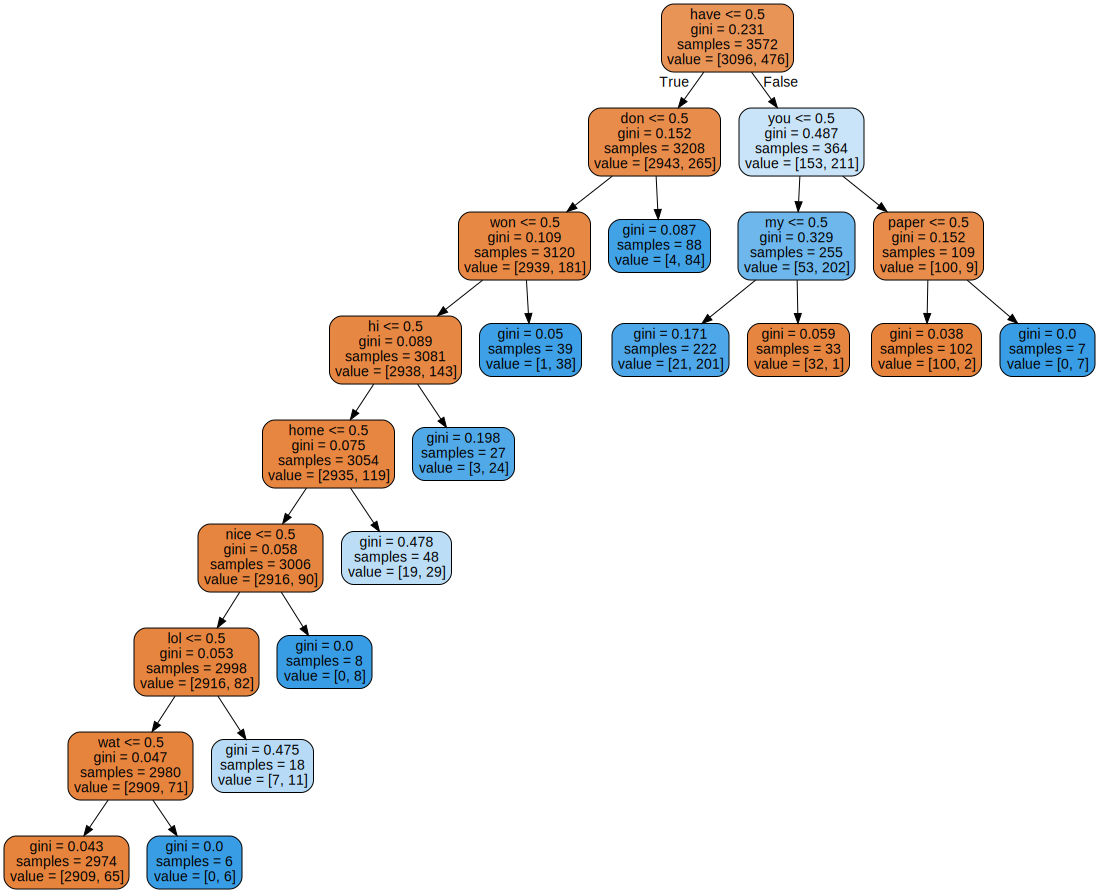

In [30]:
features = word_dict.keys()
features = list(features)
features.pop(0)

import graphviz
word_data = tree.export_graphviz(clf, feature_names=features, filled=True, rounded=True)
graph = graphviz.Source(word_data)
graph

# import graphviz
# dot_data = tree.export_graphviz(clf, feature_names=feats, filled=True, rounded=True)
# graph = graphviz.Source(dot_data)
# graph

Generative process:
1. find the probability that the chosen label is 'y': P(y)
probability that label 'y' is spam: P(y)=13%
2. generate an instance vector 'x' to determine the probability that a spammer would use the word: P(x|y)

Sample Messages:
Normal Message (20) : 3G 3R 2O 3Y 2LB 2B 2DB 1P 1DP
Spammer Message (9) : 1Y 1G 3LB 2P 1DP

Probability the message came from a spammer before looking at the message
P(spammer) (9/20) or 31%

Looking now at the message, it's a 'P'
Now what's the probability it's from a spammer?

Posterior Probability is 3/4 chance given purple (P)
(3 from spammer, 1 from normal)
P(spammer|purple)

P(spammer|purple) = P(spammer AND purple) / P(purple)
3/4               = 3/29                  / 4/29

P(spammer AND purple) = P(spammer) * P(purple|spammer)
3/29                  = 9/29       * 3/9

P(purple) = P(spammer AND purple) + P(normal AND purple)
4/29      = 3/29                  + 3/9

(cause)/(P(spammer|purple)) = (effects)/(P(purple|spammer)) / P(purple)



Naive Bayes::
1. Choose a label via P(y) = #y labels in training data / size of training
2. Choose an instance vector:
    P(x|y) = P(x1|y) ... P(xn|y)
    num of times x1 appears in a y message / num words in y message
3. For a new vector x-prime, (
    P(y and x-prime)/P(x-prime)) * (P(y)/P(y)) =
    P(y and x-prime)/P(y)) * (P(y)/P(x-prime)) =
    P(x-prime|y) P(y)/P(x-prime)
    P(x-prime|y) P(y)/(P(x-prime|y) P(y)+P(x-prime|not y) P(not y))

In [31]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(traindat,trainlabs)
clf = clf.fit(traindat, trainlabs)
yhat = clf.predict(testdat)
acc = sum([yhat[i] == testlabs[i] for i in range(len(testdat))])/len(testdat)
acc

0.9485

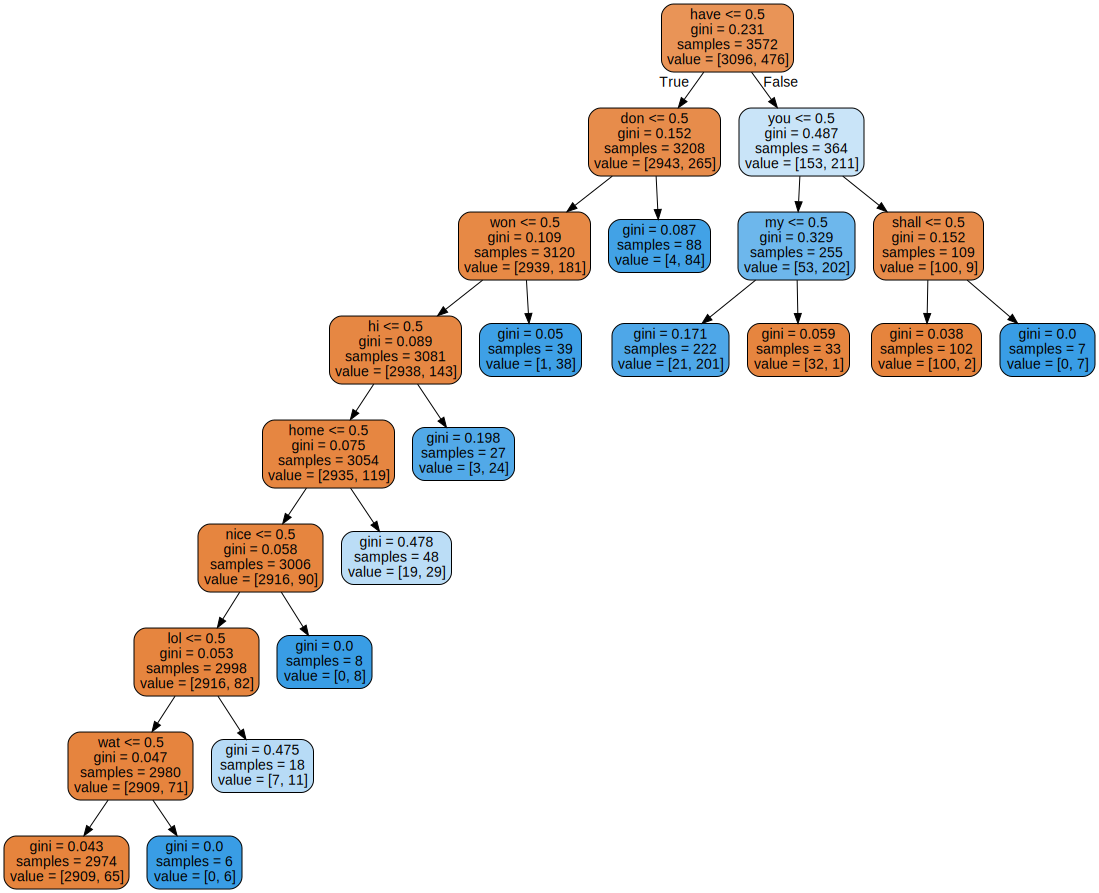

In [32]:
import graphviz
word_data = tree.export_graphviz(clf, feature_names=features, filled=True, rounded=True)
graph = graphviz.Source(word_data)
graph